The mathematical formula for a linear SVM can be expressed as:

𝑓(𝑥)=𝑤^𝑇𝑥+𝑏

where:
w is the weight vector,
x is the input feature vector,
b is the bias term. The goal is to find a hyperplane that maximizes the margin between two classes, which is determined by the vector

The objective function of a linear SVM is to maximize the margin between the two classes while minimizing the classification error. This is mathematically formulated as:

min 1/2∥𝑤∥^2
 
subject to the constraint that for all data points, 
𝑦𝑖(𝑤^𝑇𝑥𝑖+𝑏)≥1

where 
𝑦𝑖 is the label of the data point 𝑥𝑖

The kernel trick in SVM is a technique used to enable the algorithm to work in higher-dimensional spaces without explicitly mapping the data points to these higher dimensions. By using a kernel function (e.g., polynomial, radial basis function), SVM can create non-linear decision boundaries even in the original input space, while keeping computational complexity low.

Support vectors in SVM are the data points that are closest to the decision boundary (hyperplane). These points have the most influence on defining the optimal hyperplane. For example, in a 2D plane, support vectors are the points that lie on the margin boundaries, and the SVM classifier depends heavily on them to determine the decision boundary.

Hyperplane: A hyperplane is the decision boundary that separates the two classes. It maximizes the margin between the two classes.

Marginal plane: The marginal plane is the space where the support vectors lie. It is equidistant from the two classes.

Soft margin: This allows some misclassification to handle non-linearly separable data.

Hard margin: This assumes the data is linearly separable and there are no misclassifications.

Accuracy: 80.00%


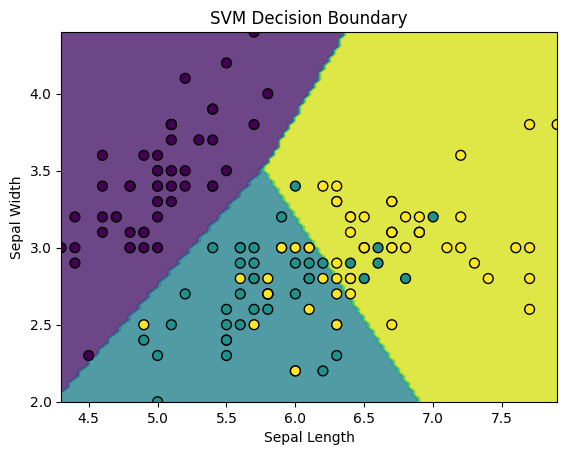

Accuracy with C=0.1: 82.22%
Accuracy with C=1: 80.00%
Accuracy with C=10: 80.00%


In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolors='k', s=50)
plt.title('SVM Decision Boundary')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

for c in [0.1, 1, 10]:
    svm = SVC(kernel='linear', C=c)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with C={c}: {accuracy * 100:.2f}%")